# Homework #2

**See Canvas for HW #2 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the scanning policy in the syllabus. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## A.1 Some probability calculations

**A.1(a) [10 points] The CU Boulder triathlon team has $12$ women and $9$ men. The team is going to a race and can only enter $5$ participants. What is the probability of randomly selecting a race squad of $5$ participants with exactly $3$ women?**

- Combination because order doesn't matter
$$ C(n, r) = \frac{n!}{(n - r)! r!} $$

- Number of ways to choose three women out of 12: 
$$ C(12, 3) = \frac{12!}{(12 - 3)! * 3!} $$

- Number of ways to choose two men out of nine:
$$ C(9, 2) = \frac{9!}{(9 - 2)! * 2!} $$

- Number of ways to choose 5 people out of 21:
$$ C(21, 5) = \frac{21!}{(21 - 5)! 5!} $$

- Probability of choosing three women and two men for the team:
$$ P = \frac{C(12, 3) * C(9, 2)}{C(21, 5)} $$

In [1]:
combination = function(n, r){
    factorial(n) / (factorial(n - r) * factorial(r))
}

In [31]:
com_12_3 = combination(12,3)
com_9_2 = combination(9, 2)
com_21_5 = combination(21, 5)
prob_race_squad = (com_12_3 * com_9_2) / com_21_5
cat("The probability that a race squad of 5 contains exactly three women is: ", prob_race_squad)

The probability that a race squad of 5 contains exactly three women is:  0.3892083

**A.1(b) [10 points] What is the probability that at least two people in a room of 45 have the same birthday? Assume that all possible birthdays are equally likely, and ignore leap year. (HINT: You might consider using the theorem $P(A^C) = 1−P(A)$. If you use factorials and get overflow errors, or that the probability is $0$, I suggest writing a loop in `R` to calculate the probability.)**

- Probability that no two people share a birthday (product rule):
$$ P(\text{no shared birthday}) = \prod_{i=0}^{44} \frac{365 - i}{365} $$
- The bounds are from 0 to 44 because the first person can have their birthday on any of the 365 days

$$ P(\text{at least two people share a birthday}) = 1 - P(\text{no shared birthday}) $$
- Easier to use the probability of the complement because you would have to compute the probability that exactly two people share a birthday, exactly three, exactly four, and so on until 44

In [32]:
#initialize the probability that no one shares a bday is one
no_shared_bday = 1
for (x in 0:44){
    no_shared_bday = no_shared_bday * ((365 - x) / 365)
}

shared_bday = 1 - no_shared_bday
cat("The probability that at least two people out of a room of 45 share a birthday is:", shared_bday)

The probability that at least two people out of a room of 45 share a birthday is: 0.9409759

**A.1(c) [10 points] Three dice are thrown. What is the probability that a sum of $12$ appears on the faces?**

$$ x_1 + x_2 + x_3 = 12 $$
$$ \text{where} 1 \leq x_1, x_2, x_3 \leq 6 $$

- Dice that would sum to give us 12: 

$$ (6, 5, 1) $$
$$ (6, 4, 2) $$
$$ (6, 3, 3) $$
$$ (5, 5, 2) $$
$$ (5, 4, 3) $$
$$ (4, 4, 4) $$

- Since the order matters, we need to count the number of permutations: 
$$ P(n, r) = \frac{n!}{(n-r)!} $$

- Number of permutations for: 
$$ (6, 5, 1) = 6 $$
three different numbers = six different ways to arrange the numbers
$$ (6, 4, 2) = 6 $$
$$ (6, 3, 3) = 3 $$
two different numbers = three different ways to arrange the numbers because it only depends on the placement of the six
$$ (5, 5, 2) = 3 $$
$$ (5, 4, 3) = 6 $$
$$ (4, 4, 4) = 1 $$

$$ 6 + 6 + 3 + 3 + 6 + 1 = 25 $$
$$ \text{Total amount of outcomes =} 6 * 6 * 6 = 216 $$
$$ \text{Probability that the sum of three dice equals 12: } \frac{25}{216} = 0.1157 $$

## A.2 Probability and Causality

What does it mean for one event C to cause another event E—for example, smoking (C) to cause cancer (E)? There is a long history in philosophy, statistics, and the sciences of trying to clearly analyze the concept of a cause. One tradition says that causes raise the probability of their effects; we may write this symbolically as

$$P(E | C)>P(E) \quad \quad (1)$$


**A.2(a) [10 points] Does equation (1) imply that $P(C | E) > P(C)$? If so, prove it. If not, give a counter example.**




Equation (1) implies that that $ P(C|E) > P(C) $ because of Bayes Theorem and the law of total probability. 

$$ P(E|C) = \frac{P(C|E)P(E)}{P(C)} > P(E) \text{   and   } P(C|E) = \frac{P(E|C)P(C)}{P(E)} > P(C) $$

$$ P(C|E)P(E) < P(E)P(C) \text{   and   } P(E|C)P(C) < P(C)P(E) $$

$$ P(C|E) > P(C) \text{   and   } P(E|C) > P(E) $$


**A.2(b) [10 points] [*Optional for students in STAT 4000*] Another way to formulate a probabilistic theory of causation is to say that**

$$P (E | C) > P(E | C^C). \qquad \qquad (2)$$ 

**Show that equation (1) from A.2(a) implies equation (2).**

Given $ P(E|C) > P(E) $ and $ P(E|C) > P(E|C^C) $ we know that the probability of E given C is greater than the probability of E given that event C did not occur. We can decompose P(E), using the law of total probability, to:
$$ P(E) = P(E|C)*P(C) + P(E|C^C)*P(C^C) $$

Since we know that $ P(E|C) > P(E) $ and $ P(E) $ is a weighted sum, $ P(E|C^C) < P(E|C) $ so that $ P(E) \leq 1 $


## A.3 Conditional probabilities

Suppose a particular crime is committed in Jerry’s apartment. We’d like to know whether Newman is guilty of the crime. We are torn as to whether we think he is guilty: we think it’s equally likely that he guilty or not guilty. Suppose that, in similar situations, we know that if a suspect is guilty, 85% of the time their finger prints are found at the scene, and, we know that if a suspect is not guilty, 30% of the time their finger prints are found at the scene.

**A.3(a) [5 points] What is the probability that Newman’s finger prints are found at the scene?**

$$ G = \text{Guilty} $$ 
$$ G^c = \text{Not Guilty} $$
$$ F = \text{Finger prints} $$
$$ F^c = \text{No Finger prints} $$

$$ P(G) = 0.50 $$
$$ P(G^c) = 0.50 $$
$$ P(F|G) = 0.85 $$
$$ P(F|G^c) = 0.30 $$

$$ P(F) = P(F|G)*P(G) + P(F|G^c)*P(G^c) $$

In [33]:
p_g = 0.5
p_gc = 0.5
p_fg = 0.85
p_fgc = 0.30

p_f = p_fg*p_g + p_fgc*p_gc
cat("The probability that Newman's fingers are at the crime scene is:", p_f)

The probability that Newman's fingers are at the crime scene is: 0.575

**A.3(b) [5 points] If Newman’s finger prints are found at the scene, how likely is it that he is guilty?**

$$ P(G|F) = \text{Probability that Newman's finger prints are at the scene, given that he is guilty} $$
*Use Bayes Theorem* 
$$ P(G|F) = \frac{P(F|G)*P(G)}{P(F)} $$

In [34]:
p_gf = (p_fg * p_g) / p_f
cat("The probability that Newman is guilty, given that his finger prints are at the scene is: ", p_gf)

The probability that Newman is guilty, given that his finger prints are at the scene is:  0.7391304

**A.3(c) [7 points] If Newman’s finger prints are not found at the scene, how likely is it that he is guilty?**

$$ P(G|F^c) = \text{Probablity that Newman's finger prints are not on the scene, given that he is guilty} $$
*Use Bayes Theorem*
$$ P(G|F^c) = \frac{P(F^c|G)*P(G)}{P(F^c)} $$
$$ P(F^c|G) = 1 - P(F|G) $$
$$ P(F^c) = 1 - P(F) $$

In [35]:
p_fcg = 1 - p_fg
p_fc = 1 - p_f

p_gfc = (p_fcg * p_g) / p_fc
cat("The probability that Newman is guilty, given that his finger prints are not at the scene is: ", p_gfc)

The probability that Newman is guilty, given that his finger prints are not at the scene is:  0.1764706

## B. Computational Problems

## B.1 Probability Simulations

There is an urn that has $100$ marbles in it: $2$ are red, $70$ are yellow, $13$ are green and $15$ are blue. Simulate data to imitate someone drawing a marble from the urn (replacing after each draw), with the color recorded at each draw (HINT: the `sample()` function in `R` will be useful here).

**B.1(a) [8 points] Plot the fraction of times a yellow marble is drawn in the first $1000$ draws. On the $x$-axis, include the number of draws, and on the $y$-axis, include the cumulative fraction of yellow draws. Why does this number fluctuate more when the number of draws is smaller?**

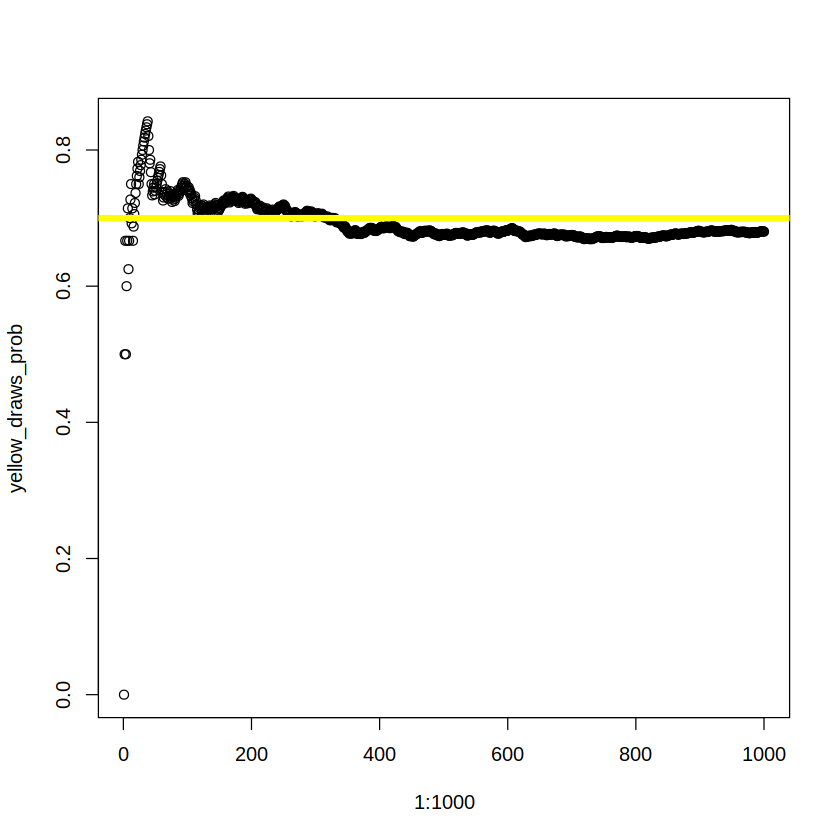

In [7]:
library(ggplot2)

colors = c('red', 'yellow', 'green', 'blue')
marble = sample(colors, size=1000, prob = c(2/100, 70/100, 13/100, 15/100), replace=TRUE)

yellow_draws_prob = numeric(1000)
yellow_marbles = 0

for (i in 1:1000){
    if (marble[i] == 'yellow'){
        yellow_marbles = yellow_marbles + 1
    }
    yellow_draws_prob[i] = yellow_marbles / i
}

plot(1:1000, yellow_draws_prob)
abline(h = 0.70, col = 'yellow', lwd = 5)

**B.1(b) [5 points] About how many draws are needed before the proportion of yellow marbles drawn in the simulated data is within $ 0.1 $ of the true probability of drawing a yellow marble? You can answer using a visual assessment of your plot from the previous part.**

To be within the true probability of 0.1 for drawing a yellow marble, it appears to take less than 100 trials to fall within this range. Since our true proportion of yellow marbles in the urn is 0.70, we're looking for the range for when the data remains within 0.60-0.80. This happens before, or around the 100th trial. 

**B.1(c) [8 points] Repeat the two steps above for the red marble. What do you notice that is different, and why do you think it is different?**



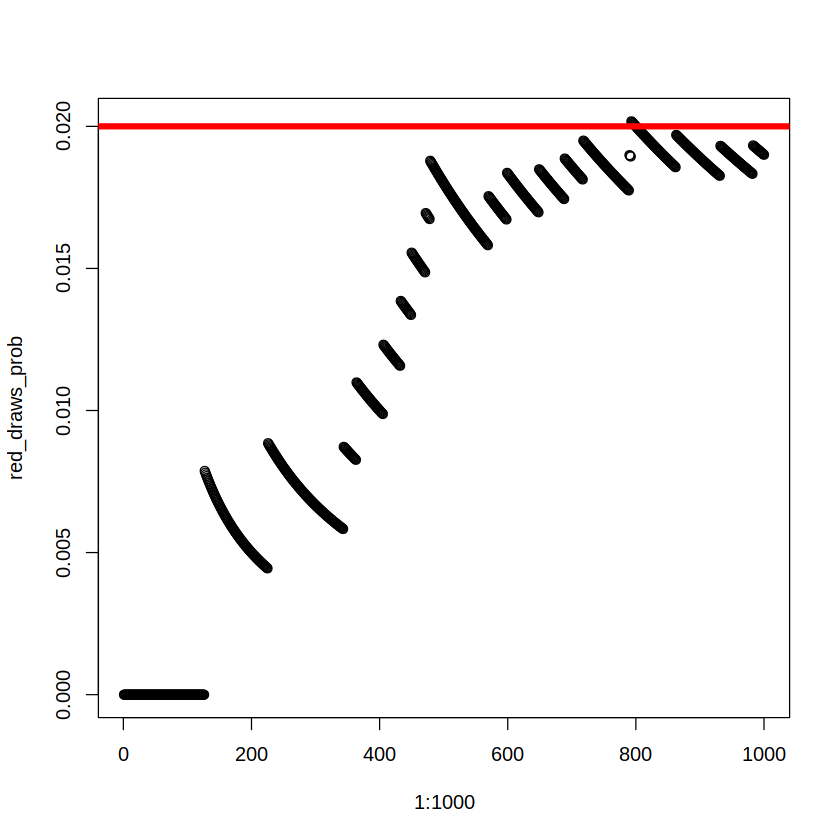

In [8]:
red_draws_prob = numeric(1000)
red_marbles = 0

for (i in 1:1000){
    if (marble[i] == 'red'){
        red_marbles = red_marbles + 1
    }
    red_draws_prob[i] = red_marbles / i
}

plot(1:1000, red_draws_prob)
abline(h = 0.02, col = 'red', lwd = 5)

Since we're replacing the marbles after we take one out, we see that after we draw a red marble, we're more likely to draw a red marble after it. It also takes longer, until about the 400th trial that we're able to remain within 0.1 of the true probability. It takes longer to be within this range because with only two marbles out of 100 being red, more samples need to be taken to achieve the true probability. Furthermore, the law of large numbers reflects the necessity for more trials to smooth out the rarity of the event. 

## B.2 Probability confirmations?

**B.2(a) [6 points] Run a simulation that estimates the probability calculation in theoretical question A.1(b). That is, simulate the birthdays (you can use the numbers 1 through 365)  of 45 people many many times (e.g., `m = 100,000`), and find the relative frequency of cases in which at least two people share a birthday (HINT: The `anyDuplicated()`, `sample()}` and `replicate()}` functions may be useful here).**

In [37]:
shared_birthdays = function(){
    birthdays = sample(1:365, size = 45, replace = TRUE)
    length(birthdays) != length(unique(birthdays))
}

replicate = replicate(1000, shared_birthdays())

relative_frequency = mean(replicate)
cat("The probability that at least two people out of a room of 45 share a birthday is:", relative_frequency)

The probability that at least two people out of a room of 45 share a birthday is: 0.94

**B.2(b) [6 points] Run a simulation that estimates the probability calculation in theoretical question A.1(c).**

In [38]:
num_dice = 3
num_faces = 6
target_sum = 12
total_possibilities = 6*6*6

all_possible_outcomes = expand.grid(rep(list(1:num_faces), num_dice))

#this line of code generates all possible outcomes

#expand.grid is used to create a data frame with all the values that can be formed with the combinations 
#of all the vectors or factors passed to the function as an argument.

#rep is designed to replicate its first argument a number of times equal to its second argument
#replicates the number of faces for each die

#need list because expand.grid expects the inputs to be a list 

sum_column = rowSums(all_possible_outcomes)

all_target_sums = sum(sum_column == target_sum)

#using sum() command because the sum_column == target_sum returns a boolean, which will be treated as a 1/0

total_probability_of_12 = all_target_sums / total_possibilities
cat("The probability of rolling three dice whose sum equals 12 is: ", total_probability_of_12)

The probability of rolling three dice whose sum equals 12 is:  0.1157407